## Facultad de Estudios Superiores Acatlán

## Matemáticas Aplicadas y Computación

## Mineria de datos

## Eduardo Colín Sanchez

## Practica 2

_________________________________________________________________________________________________________________

### Objetivo

El objetivo de esta práctica es aplicar los conocimientos adquiridos a lo largo de los semestres para desarrollar un modelo de predicción capaz de determinar si una persona tiene diabetes o no. Para ello, se utilizarán técnicas de aprendizaje automático, asegurando un enfoque basado en datos para mejorar la precisión y confiabilidad del modelo.

_________________________________________________________________________________________________________________

### Diabetes

La diabetes es una enfermedad crónica que afecta a millones de personas en todo el mundo y cuya detección temprana es fundamental para mejorar la calidad de vida de los pacientes. Gracias a los avances en el análisis de datos y el aprendizaje automático, es posible desarrollar modelos que ayuden a predecir la presencia de diabetes a partir de diversas variables clínicas.

En este estudio, se implementa un modelo basado en Máquinas de Soporte Vectorial (SVM) para predecir si un paciente tiene diabetes o no, utilizando un conjunto de datos con información relevante sobre factores de riesgo. Además, se aplica el algoritmo de k-means para identificar posibles patrones dentro de los datos que puedan proporcionar información adicional sobre la distribución de los casos.

El objetivo principal de este análisis es evaluar la efectividad de la SVM como método de clasificación y explorar la utilidad de k-means en la segmentación de datos relacionados con la diabetes. A través de este enfoque, se busca contribuir al desarrollo de herramientas predictivas que puedan asistir en la toma de decisiones médicas y mejorar la detección temprana de la enfermedad.
_________________________________________________________________________________________________________________

El siguiente codigo indica los pasos que segui para obtener los obejtivos planteados:

Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import io

import scipy.stats as stats
from scipy.stats import kstest

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

import psycopg2

En el siguiente paso, se establece una conexión con la base de datos en AWS. Esta base de datos ya ha sido importada previamente y ahora se procederá a conectar a ella.

In [74]:
# Datos de Conexion

host = "db1.chmwwemyog3a.us-east-2.rds.amazonaws.com"
port = "5432"
dbname = "db1"
user = "db1"
password = "ame99972517"

# Establecer conexión
try:
    conexion = psycopg2.connect(
        host=host,
        port=port,
        dbname=dbname,
        user=user,
        password=password
    )
    print("Conexión exitosa")
except Exception as e:
    print(f"Error de conexión: {e}")

Conexión exitosa


In [ ]:
# Consulta de datos

cursor = conexion.cursor()
cursor.execute("SELECT * FROM diabetes;")
rows = cursor.fetchall()

data = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

data.head()

,ID,Edad,BMI,Glucosa,Presion,HbA1c,LDL,HDL,Trigliceridos,Cintura,Cadera,WHR,Familia,Dieta,Hipertension,Medicamentos,Diabetes
0,1,69,28.39,130.1,77,5.4,130.4,44,50,90.5,107.9,0.84,0,0,0,1,0
1,2,32,26.49,116.5,72,4.5,87.4,542,1299,113.3,81.4,1.39,0,0,0,0,0
2,3,89,25.34,101.0,82,4.9,112.5,568,1776,84.7,107.2,0.79,0,0,0,1,0
3,4,78,29.91,146.0,104,5.7,50.7,391,117,108.9,110.0,0.99,0,0,0,1,1
4,5,38,24.56,103.2,74,4.7,102.5,291,1459,84.1,92.8,0.91,0,1,0,0,0


In [83]:
df = data.copy()
df.head()

,ID,Edad,BMI,Glucosa,Presion,HbA1c,LDL,HDL,Trigliceridos,Cintura,Cadera,WHR,Familia,Dieta,Hipertension,Medicamentos,Diabetes
0,1,69,28.39,130.1,77,5.4,130.4,44,50,90.5,107.9,0.84,0,0,0,1,0
1,2,32,26.49,116.5,72,4.5,87.4,542,1299,113.3,81.4,1.39,0,0,0,0,0
2,3,89,25.34,101.0,82,4.9,112.5,568,1776,84.7,107.2,0.79,0,0,0,1,0
3,4,78,29.91,146.0,104,5.7,50.7,391,117,108.9,110.0,0.99,0,0,0,1,1
4,5,38,24.56,103.2,74,4.7,102.5,291,1459,84.1,92.8,0.91,0,1,0,0,0


Comenzaremos a trabajar con el DataFrame. Identificaremos las columnas importantes que debemos mantener, analizaremos los valores nulos y detectaremos valores atípicos.

In [84]:
# Se eliminarán las siguientes columnas, ya que no aportan información relevante para el análisis:

# ID: No proporciona información útil para el modelo.

# Dieta: Esta columna contiene solo tres valores, que representan las dietas de las personas (balanceada, no balanceada y vegana)
# Sin embargo, tras investigar el tema, se concluye que es difícil clasificar las dietas de las personas 
# en solo tres categorías, por lo que se eliminará.

df.drop('ID', axis=1, inplace=True)
df.drop('Dieta', axis=1, inplace=True)

In [85]:
#No hay valores nulos

print("Valores nulos: \n",df.isnull().sum())

Valores nulos: 
 Edad             0
BMI              0
Glucosa          0
Presion          0
HbA1c            0
LDL              0
HDL              0
Trigliceridos    0
Cintura          0
Cadera           0
WHR              0
Familia          0
Hipertension     0
Medicamentos     0
Diabetes         0
dtype: int64


Se graficarán de manera general los datos de cada una de las columnas para obtener una visión global de la distribución y características de los datos.

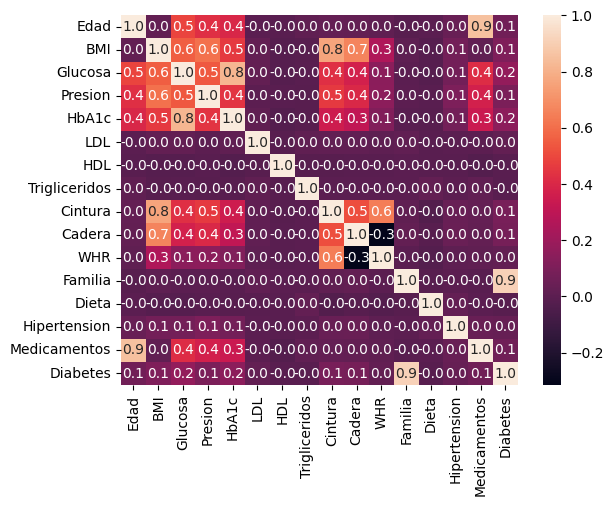

In [20]:
correlacion = df.corr()
sns.heatmap(correlacion, annot=True, fmt = '.1f')
plt.show()

In [90]:
continuos = df[['Edad','BMI','Glucosa','Presion','HbA1c','LDL','HDL','Trigliceridos','Cintura','Cadera','WHR']]
categoricas = df[['Familia','Hipertension','Medicamentos']]
y = df['Diabetes']

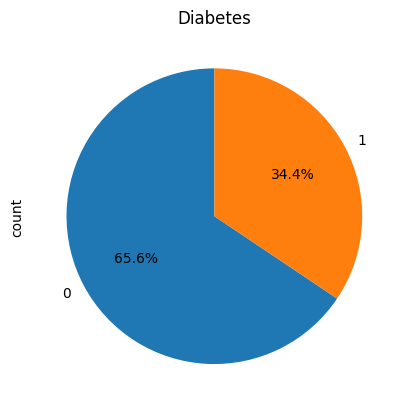

In [96]:
# Grafica de la variable de salida

cn = df['Diabetes'].value_counts()
cn.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Diabetes')
plt.show()

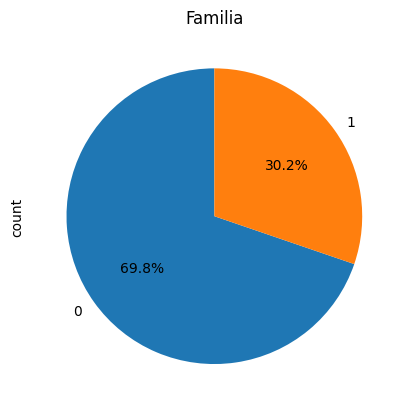

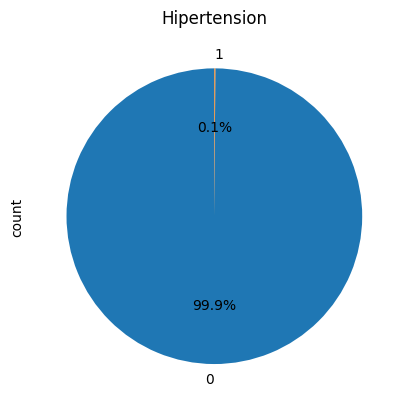

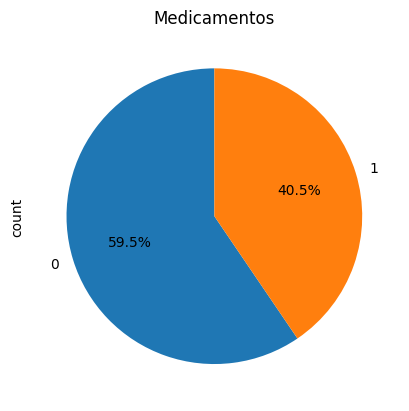

In [94]:
#Grafica de las variables categoricas

for i in categoricas.columns:
  cn = categoricas[i].value_counts()
  cn.plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(i)
  plt.show()

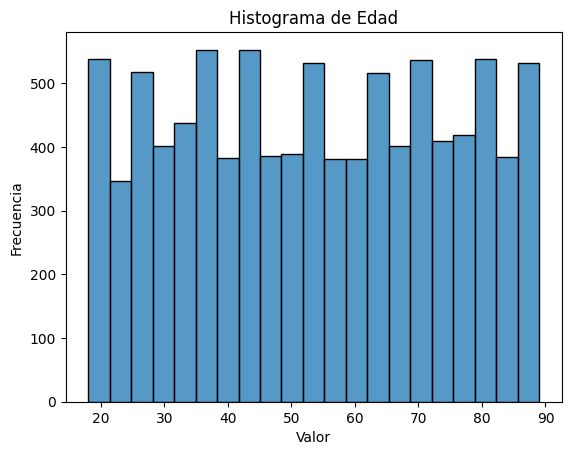

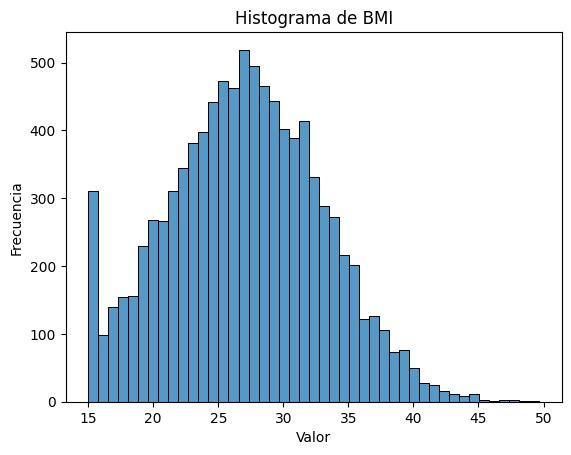

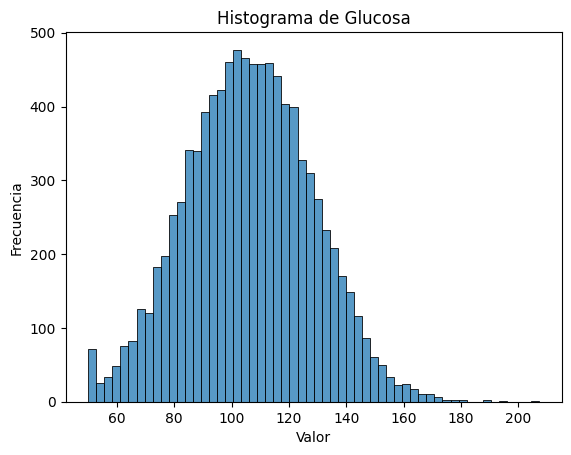

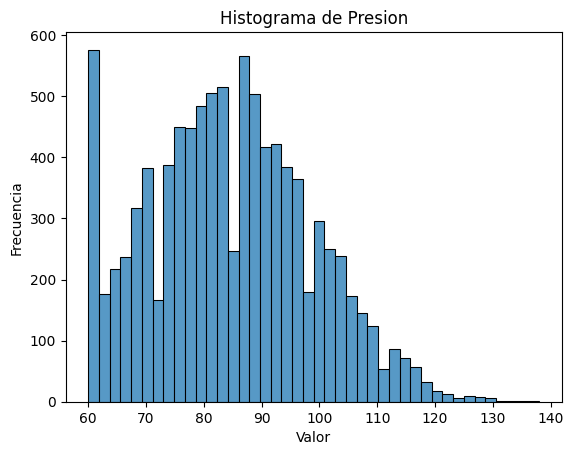

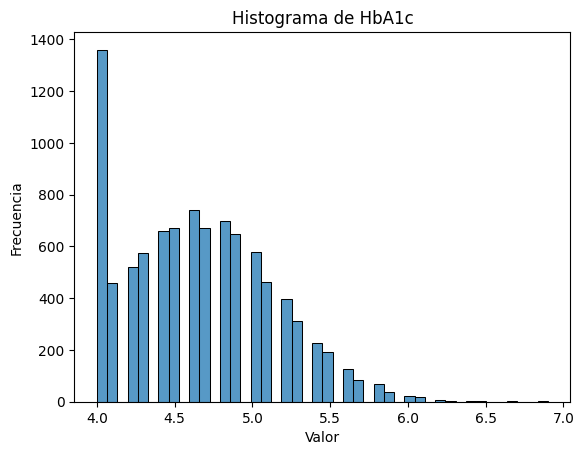

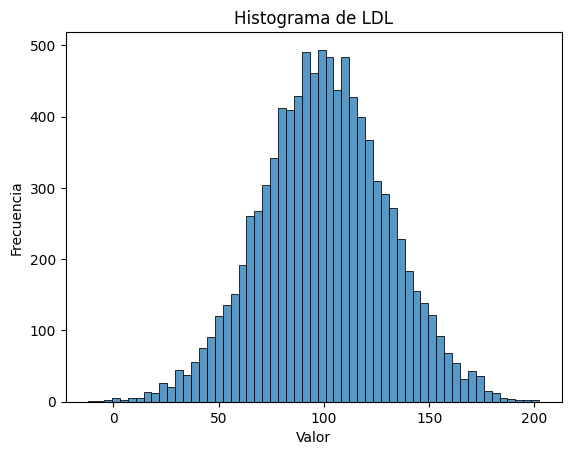

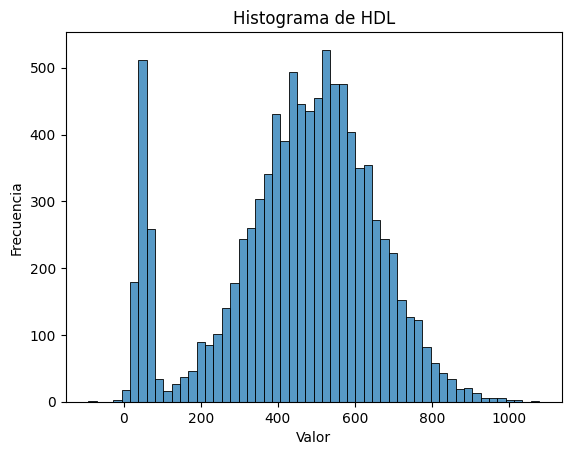

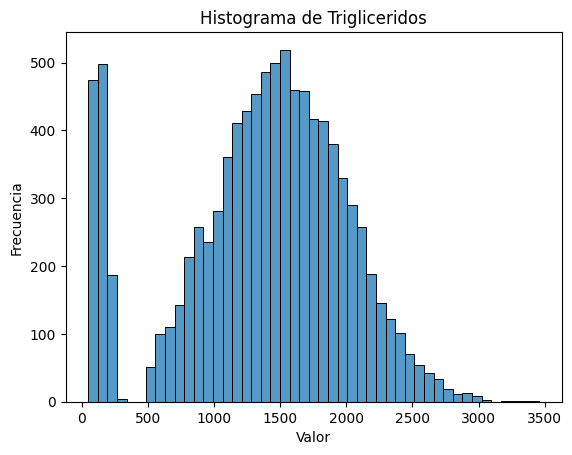

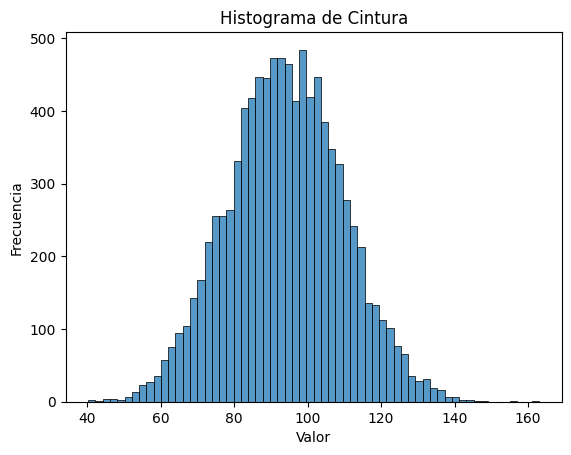

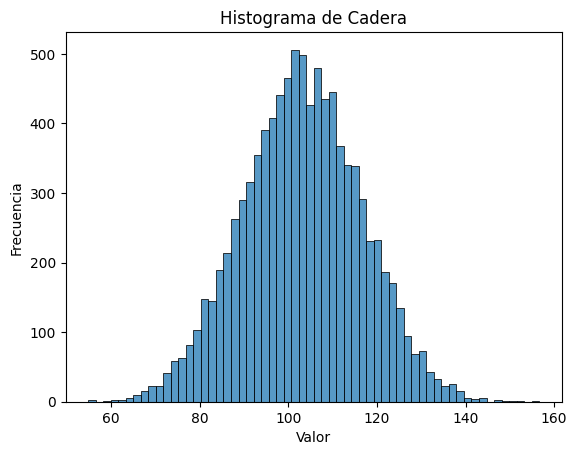

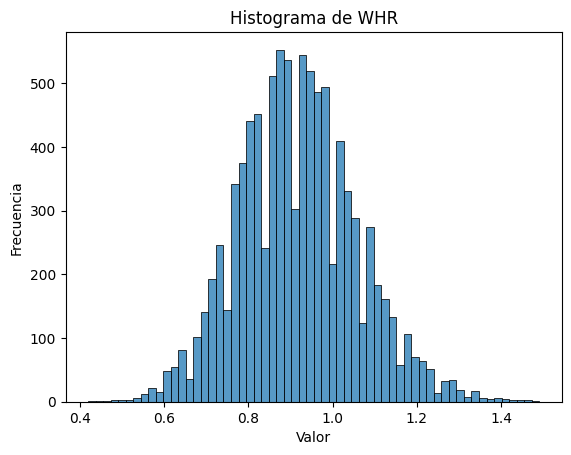

In [97]:
# Histogramas de las variables continuas

for i in continuos.columns:
  sns.histplot(continuos[i])
  plt.xlabel("Valor")
  plt.ylabel("Frecuencia")
  plt.title(f"Histograma de {i}")
  plt.show()

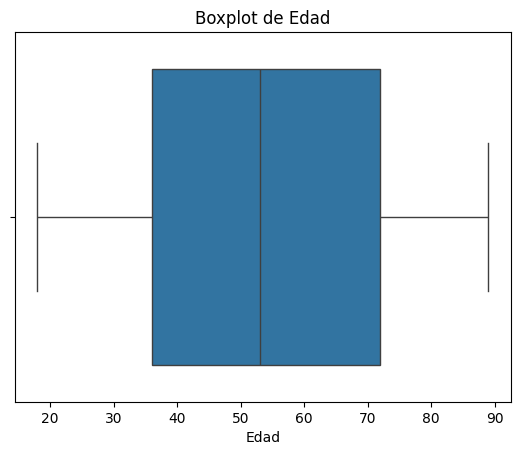

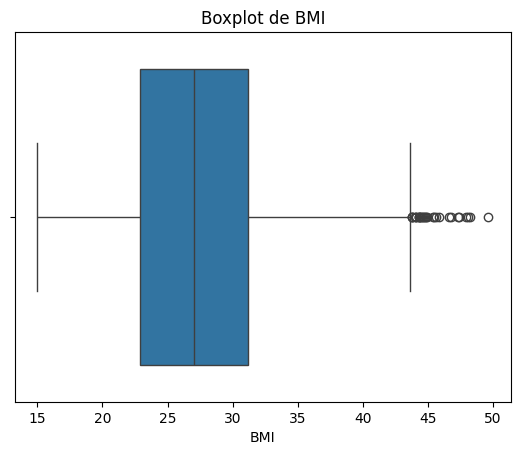

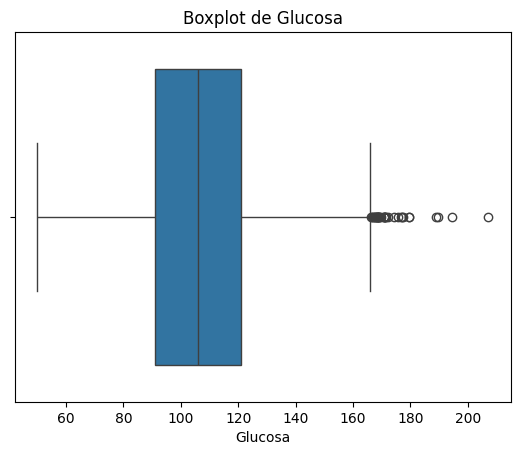

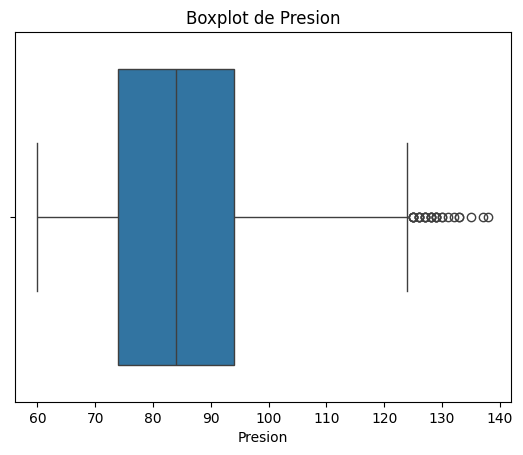

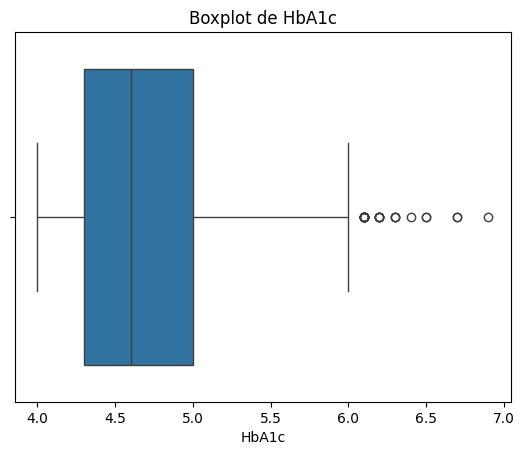

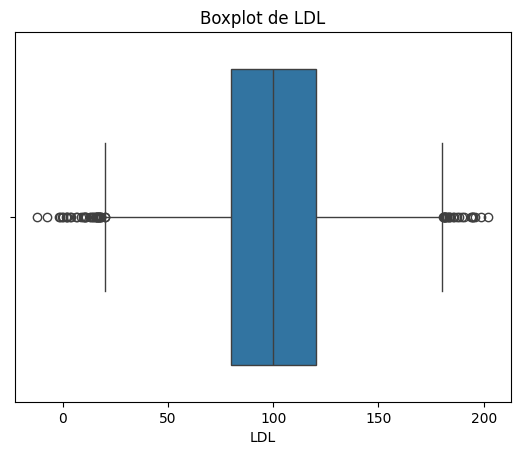

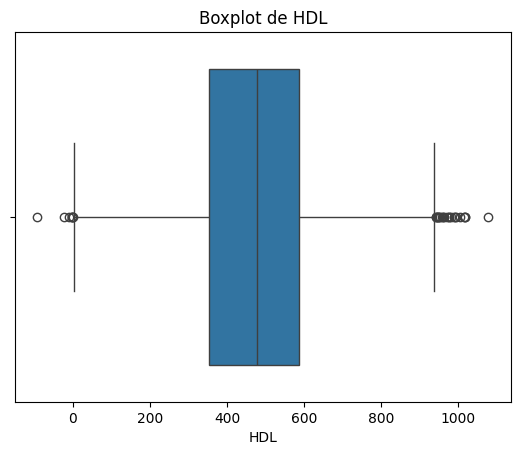

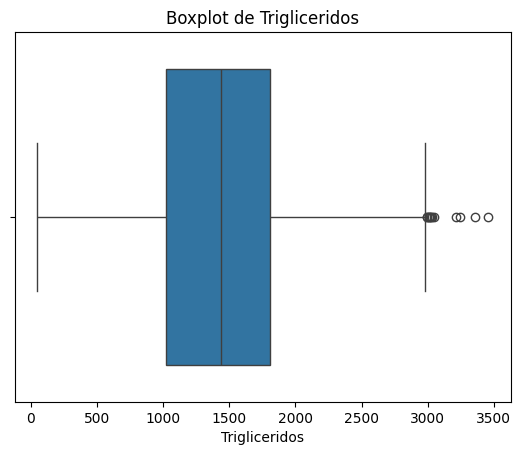

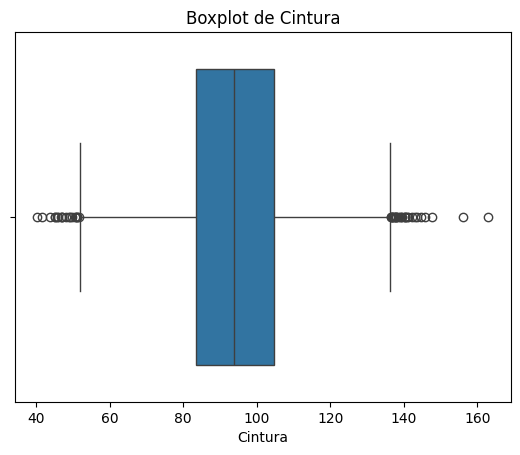

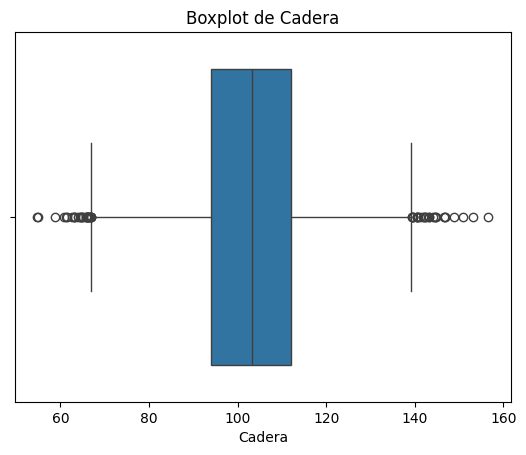

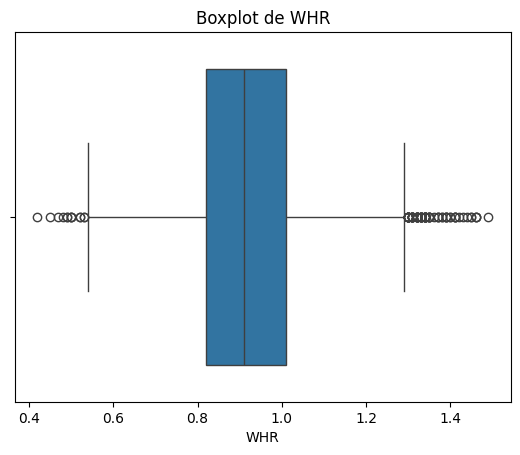

In [98]:
#Boxplot de las variables continuas para ver si hay outliers

for i in continuos.columns:
  sns.boxplot(x=df[i])
  plt.title(f'Boxplot de {i}')
  plt.show()

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  abajo = Q1 - 1.5 * IQR
  arriba = Q3 + 1.5 * IQR
  outliers = df[(df[i] < abajo) | (df[i] > arriba)]

Al analizar los datos con boxplots, se identificaron varios valores atípicos. Sin embargo, la mayoría de los datos atípicos en las columnas son médicamente comprensibles, ya que en ciertos casos clínicos pueden aparecer valores alejados de lo normal. Dado que el estudio está enfocado en la diabetes, estos valores atípicos deberían ser considerados, excepto en dos columnas.

Las columnas de LDL y HDL presentan valores que no solo son médicamente improbables, sino que son imposibles, ya que muestran valores negativos.

Con estos datos, procederemos a eliminar los registros correspondientes y verificaremos que la distribución no haya cambiado de manera significativa.

In [100]:
# Kolmogorov-Smirnov

def KS(df1,df2):
  d_stat, p_value = kstest(df1, df2)

  if p_value < 0.1:
    print("Las distribuciones de son significativamente diferentes.")
  else:
    print("Las distribuciones son significativamente iguales.")

In [101]:
#Eliminamos en LDL los outliers

q1 = df['LDL'].quantile(0.25)
q3 = df['LDL'].quantile(0.75)
iqr = q3 - q1
abajo = q1 - 1.5 * iqr
arriba = q3 + 1.5 * iqr

outliers = df[(df['LDL'] < abajo) | (df['LDL'] > arriba)]

LDL = df[(df['LDL'] >= abajo) & (df['LDL'] <= arriba)]

out_abajo = df[df['LDL'] < abajo]
out_arriba = df[df['LDL'] > arriba]

KS(df['LDL'],LDL['LDL'])

Las distribuciones son significativamente iguales.


In [103]:
#Eliminamos en HDL los outliers

q1 = df['HDL'].quantile(0.25)
q3 = df['HDL'].quantile(0.75)
iqr = q3 - q1
abajo = q1 - 1.5 * iqr
arriba = q3 + 1.5 * iqr

HDL = df[(df['HDL'] >= abajo) & (df['HDL'] <= arriba)]

out_abajo = df[df['HDL'] < abajo]
out_arriba = df[df['HDL'] > arriba]

KS(df['HDL'],HDL['HDL'])

Las distribuciones son significativamente iguales.


In [104]:
df_imp = pd.merge(LDL, HDL, how='inner')

In [106]:
for i in continuos.columns:
  KS(df_imp[i],df[i])

Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.
Las distribuciones son significativamente iguales.


Al eliminar los valores atípicos, las distribuciones no se han visto afectadas de manera significativa.

In [108]:
X = df_imp[['Edad','BMI','Glucosa','Presion','HbA1c','LDL','HDL','Trigliceridos','Cintura','Cadera','WHR','Familia','Hipertension','Medicamentos']]
y = df_imp['Diabetes']

Reducimos los componentes

In [124]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)

X_pca = pca.fit_transform(X_scaled)

print('Varianza explicada por componente:', pca.explained_variance_ratio_.sum())

Varianza explicada por componente: 0.8750000000000007


Es importante reducir la cantidad de componentes, ya que esto permite retener las columnas más relevantes y minimizar la dependencia entre ellas.

Generamos un primer modelo.

In [126]:
X = X_pca
y = df_imp['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='poly')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Precisión: 0.9714134462678666

Matriz de Confusión:
[[1240    2]
 [  52  595]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1242
           1       1.00      0.92      0.96       647

    accuracy                           0.97      1889
   macro avg       0.98      0.96      0.97      1889
weighted avg       0.97      0.97      0.97      1889



El modelo presenta un buen rendimiento, alcanzando una precisión del 97%, lo que indica que clasifica correctamente la mayoría de los casos. La matriz de confusión muestra 3 falsos positivos y 53 falsos negativos, lo que sugiere que, aunque el modelo es eficaz para identificar a las personas sin diabetes, tiene algunas dificultades para detectar correctamente los casos con diabetes. El recall para la clase positiva (diabetes) es del 92%, lo que indica que algunos casos de diabetes no fueron identificados.

Aunque el modelo funciona bien en general, la gestión de los falsos negativos podría mejorarse. Por lo tanto, se intentará ajustar los parámetros del modelo para optimizar su capacidad de detección de casos positivos, mejorando así su rendimiento.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(random_state=42)

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

random_search.fit(X_train_scaled, y_train)

print("Mejores parámetros (Randomized Search):", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo ajustado (Randomized Search): {accuracy:.4f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros (Randomized Search): {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Precisión del modelo ajustado (Randomized Search): 0.9725


El resultado indica que el modelo ha sido ajustado exitosamente mediante RandomizedSearchCV con 3 particiones para validación cruzada, probando 10 configuraciones diferentes de parámetros. Los mejores parámetros encontrados fueron: kernel='rbf', gamma='scale' y C=10, lo que sugiere que la máquina de soporte vectorial proporciona el mejor rendimiento en este caso.

La precisión ajustada del modelo es 0.9756, lo cual es excelente, ya que indica que el modelo tiene una tasa de aciertos del 97.56% en el conjunto de prueba. Esto refleja un muy buen rendimiento del modelo para predecir la diabetes. Sin embargo el primer modelo generado no dista mucho de este.

En resumen, el modelo está funcionando de manera muy efectiva, y el ajuste de parámetros a través de ha sido exitoso.
__________________________________________________________________________________________________________________

La práctica resultó costosa en cuanto al tiempo invertido, pero generó un modelo efectivo. Surgieron varias dudas durante el proceso de limpieza de datos, ya que existen múltiples enfoques, como la imputación, que podrían haberse considerado. Sin embargo, se optó por eliminar los casos debido a que la proporción de datos eliminados era mínima en comparación con el total disponible. El modelo generado es bueno, pero el DataFrame no es lo suficientemente extenso. Con un conjunto de datos más amplio, es probable que el modelo hubiera sido más robusto y hubiera generado resultados más precisos sobre las personas.

Como práctica de entrada, fue excelente para entender cómo funciona el machine learning, pero aún hay áreas que necesitan mejorar para generar modelos más precisos y confiables